In [2]:
!git config --global user.name "LanceM28" 
!git config --global git config --global user.email "lmoreau@terpmail.umd.edu"

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    --worktree            use per-worktree config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-pattern]
    --get-all             get all values: key [value-pattern]
    --get-regexp          get values for regexp: name-regex [value-pattern]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value-pattern]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-pattern]
    --unset-all           remove all matches: name [value-pattern]
    --rename-section      rename section: old-name new-name
    --remove-secti

In [1]:
from pathlib import Path
from astropy.table import Table

def searcher(start_path, dirname):
    # Start from a high-level but not-too-huge root directory
    search_root = Path(str(start_path))

    # Recursively look for the directory
    matches = list(search_root.rglob(str(dirname)))

    if matches:
        jwst_dir = matches[0]  # Use the first match (or loop over all if multiple found)
        print(f"Found directory: {jwst_dir}")

        # List all files in its subdirectories
        all_files = [f for f in jwst_dir.glob("**/*") if f.is_file()]
        print(f"Found {len(all_files)} files:")
        disp_files = [str(f) for f in all_files if f.suffix == ".fits"]
        file_dict = {}
        for f in disp_files:
            df = Table.read(f)
            dex = (f.split("/")[-1]).split("_")[2]
            file_dict[dex] = df
        return file_dict
    else:
        print(f"No directory named {dirname} found.")
        


So status at this point, we have here a function which takes a search start path and a final directory path, and then scrapes all of the files in the final directory to 

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

Found directory: /Users/lamoreau/python/Aether_Spectroscopy/JWST_FITS_Calibration/NIRSpecdis
Found 7 files:
Found directory: /Users/lamoreau/python/Aether_Spectroscopy/JWST_FITS_Calibration/NIRSpecfil
Found 7 files:
WAVELENGTH
 MICRONS  
----------
       2.5
    2.5026
    2.5052
    2.5078
    2.5104
     2.513
    2.5156
    2.5182
    2.5208
    2.5234
       ...
    5.9762
    5.9788
    5.9814
     5.984
    5.9866
    5.9892
    5.9918
    5.9944
     5.997
       6.0
Length = 1347 rows


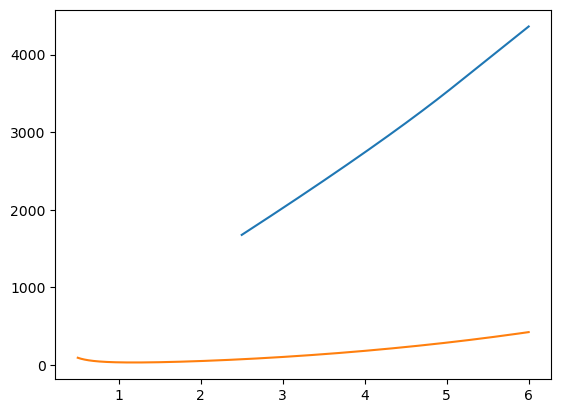

In [ ]:
JWST_disp_dict = searcher("/Users/lamoreau/python", "NIRSpecdis")
JWST_fil_dict = searcher("/Users/lamoreau/python", "NIRSpecfil")
print(JWST_disp_dict["g395h"]["WAVELENGTH"])
plt.plot(JWST_disp_dict["g395h"]["WAVELENGTH"], JWST_disp_dict["g395h"]["R"])
plt.plot(JWST_disp_dict["prism"]["WAVELENGTH"], JWST_disp_dict["prism"]["R"])



In [4]:
import numpy as np

import matplotlib.pyplot as plt



"""print(df.columns)
binmrk = np.array(df["DLDS"])
binsz = -np.diff(binmrk)
#print(binsz) #this should return the bin size of my 

print(df)

waves = np.array(df["WAVELENGTH"])
binwave = np.zeros(len(waves)-1)
for i in range(len(waves)-1):
    binwave[i] = (waves[i] + waves[i+1])/2

print(df)

dict_keys(['f140x', 'clear', 'f110w', 'f070lp', 'f100lp', 'f290lp', 'f170lp'])
WAVELENGTH      DLDS         R     
 MICRONS   MICRONS/PIXEL RESOLUTION
---------- ------------- ----------
       0.5 0.00024101489   942.9821
    0.5014 0.00024102148   945.5966
    0.5028 0.00024102798  948.21124
    0.5042 0.00024103442   950.8261
    0.5056 0.00024104076  953.44116
     0.507 0.00024104702   956.0564
    0.5084 0.00024105319   958.6719
    0.5098 0.00024105929   961.2875
    0.5112 0.00024106528   963.9033
    0.5126 0.00024107122   966.5194
       ...           ...        ...
    1.8874 0.00022601656  3795.7795
    1.8888 0.00022597554   3799.285
    1.8902 0.00022593439  3802.7935
    1.8916 0.00022589312  3806.3054
     1.893 0.00022585173  3809.8203
    1.8944 0.00022581023  3813.3386
    1.8958 0.00022576861  3816.8604
    1.8972 0.00022572688  3820.3853
    1.8986 0.00022568501  3823.9136
       1.9 0.00022564305   3827.445
Length = 1001 rows
